# 머신러닝 - 비지도 학습

## 주성분 분석

[강의자료](https://github.com/yonggyo1125/lecture_ml-dl/tree/master/06.%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5/06-3.%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D)

- ex01에서 한 일:\
    k-평균 알고리즘으로 업로드된 사진을 클러스터로 분류해 폴더 별로 저장했다.
- 문제점:\
    너무 많은 사진이 등록되어 저장 공간이 부족하다.
> 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까?

### 키워드 정리
- 차원 축소
    - 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류입니다.
    - 차원 축소는 저장 공간을 줄이고 시각화하기 쉽습니다.
    - 다른 알고리즘의 성능을 높일 수도 있습니다.
- 주성분 분석
    - 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법입니다. 이런 방향을 주성분이라고 부릅니다.
    - 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있습니다.
    - 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작습니다.
- 설명된 분산
    - 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것입니다.
    - 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있습니다.

### 핵심 패키지와 함수
`scikit-learn`의 `PCA`
- 주성분 분석을 수행하는 클래스입니다.
- n_components: 주성분의 개수 지정 (기본값 None - 샘플 개수와 특성 개수 중에 작은 값을 사용)
- random_state: 넘파이 난수 시드 값 지정
- components_ 속성: 훈련 세트에서 찾은 주성분이 저장됨
- explained_variance_ 속성: 설명된 분산이 저장됨
- explained_variance_ratio_ 속성: 설명된 분산의 비율이 저장됨
- transform(): 차원 축소
- inverse_transform(): 축소된 데이터 차원 복구 (원본 데이터 재구성)

### 차원과 차원 축소
- 특성(feature): 데이터가 가진 속성 (과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈이다)
- 머신러닝에서는 이런 특성을 **차원(dimension)**이라고 부름
- 10,000개의 특성은 결국 10,000개의 차원이라는 건데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있다. (효율 up!)
- 이를 위해 비지도 학습 작업 중 하나인 차원 축소(dimensionality reduction) 알고리즘을 다뤄 보자.
- 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다. **차원 축소**는 **데이터를 가장 잘 나타내는 일부 특성을 선택**하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있는 방법.
- 또한 줄어든 차원에서 다시 원본 차원 (예를 들어 과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이면서 복원할 수도 있습니다. 이 절에서는 대표적인 차원 축소 알고리즘인 주성분 분석(principal component analysus)을 배우겠습니다.
- 주성분 분석을 간단히 **PCA**라고도 부름

In [33]:
# 과일 사진 데이터를 넘파이 배열로 적재

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [34]:
# 차원 축소 : 차원 : 특성 개수
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [35]:
pca.components_.shape

(50, 10000)

In [63]:
# 10행 10열로 과일 이미지를 출력하는 함수 - 사이즈를 줄인다?
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):  # arr: 과일 이미지 데이터 배열, ratio: 확대 비율
    # 전체 샘플의 개수
    total = len(arr)

    # 예외처리: 샘플이 안 넘어왔을 때
    if total == 0:
        print("Error: 이미지 샘플이 없습니다.")
        return

    # 전체 행의 개수
    rows = int(np.ceil(total / 10))

    # 한 행당 열의 개수
    cols = total if rows == 1 else 10  # 행이 1개일 때는 전체 개수가 열의 개수, 그 이상일 때는 10개로 열의 개수 제한(고정)

    _, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

    # 새로 추가 S
    # if not isinstance(axs, np.ndarray) or axs.ndim < 2:  # 2차원 배열이 아닐 때만 2차원 배열로 변환
    #     axs = np.atleast_2d(axs)
    # 새로 추가 E

    for i in range(rows):
        for j in range(cols):
            # 1차원 배열에서의 2차원 배열 위치
            # ex - 3번째 행 1번째 열의 데이터(0이 시작) => 10 * 행_위치(3) + 열_위치(1)
            curr = i * 10 + j
            if curr < total:
                axs[i, j].imshow(arr[curr], cmap='gray_r')

            axs[i, j].axis('off')
    
    plt.show()

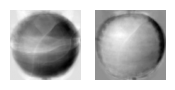

In [64]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [65]:
fruits_2d.shape

(300, 10000)

In [66]:
# 데이터 압축 - pca.transform(...) : 10000 차원 -> 50 차원 변환 (배열 차원이 아니라 특성 차원)

fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [67]:
# 원본 데이터로 복구 - pca.inverse_transform(...): 50 차원 -> 10000 차원 변환

fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

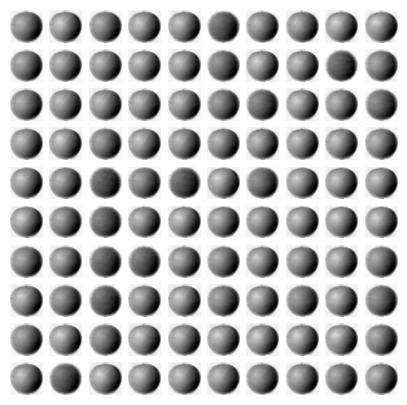

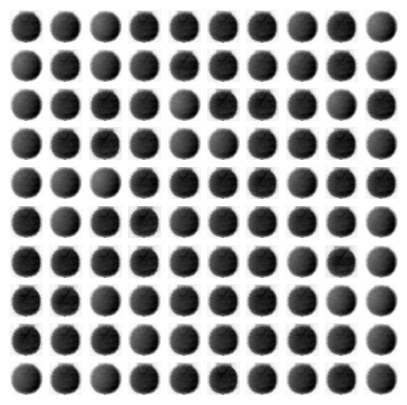

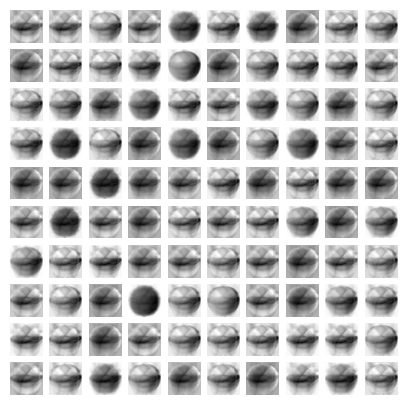

In [68]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for i in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[i:i+100], 0.5)

이미지가 흐릿하다 -> 차원 축소하면 데이터의 손실(약 8%) 발생

In [69]:
# 설명된 분산 - 축소된 주성분이 원본 데이터를 얼만큼 설명할 수 있는지 (복구 가능 비율)

np.sum(pca.explained_variance_ratio_)

np.float64(0.5229877245800595)

In [70]:
pca.explained_variance_ratio_  # 숫자가 높을수록, 이 이미지를 가장 잘 나타내는 특성이라는 것

array([0.42357017, 0.09941755])

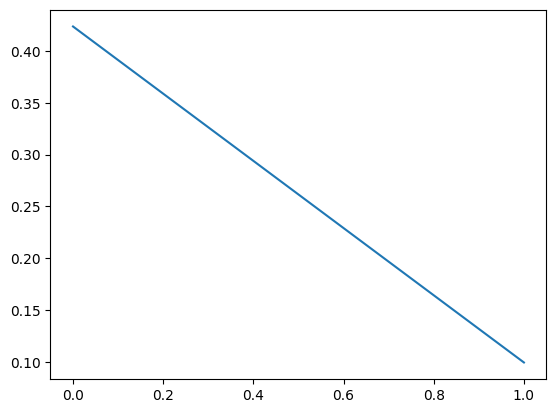

In [71]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

초반의 10개 정도가 원본 데이터를 가장 잘 설명한다.\
0.42357017 + 0.09941755 => 특성 2개만 가지고도 약 50%를 설명할 수 있다

In [72]:
# 타겟데이터 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [73]:
# 선형회귀를 쓰지만, 분류 모델이다.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# 차원 축소하기 전 성능 검증

lr = LogisticRegression()
cv = cross_validate(lr, fruits_2d, target)
print("차원 축소 X - 걸린 시간:", np.mean(cv['fit_time']))
print("차원 축소 X - 정확도:", np.mean(cv['test_score']))

# 차원 축소한 후 성능 검증

lr = LogisticRegression()
cv = cross_validate(lr, fruits_pca, target)  # 50개로 차원 축소한 데이터
print("차원 축소 O - 걸린 시간:", np.mean(cv['fit_time']))
print("차원 축소 O - 정확도:", np.mean(cv['test_score']))

차원 축소 X - 걸린 시간: 0.21609091758728027
차원 축소 X - 정확도: 0.9966666666666667
차원 축소 O - 걸린 시간: 0.01739921569824219
차원 축소 O - 정확도: 0.9933333333333334


c:\Users\admin\Desktop\Daeun-ai\09 Fintech-ML-DL\source\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\Desktop\Daeun-ai\09 Fintech-ML-DL\source\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

결과: 정확도는 똑같은데, 걸린시간이 크게 줄어들었다.

In [74]:
# n_components = 0~1 미만 값, 설명된 분산 비율

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.components_.shape)

(2, 10000)


특성이 2개로 줄었다.\
0.42357017 + 0.09941755 => 특성 2개만 가지고도 약 50%를 설명할 수 있다

In [75]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [76]:
# 특성 2개로 차원 축소한 후 성능 검증

lr = LogisticRegression()
cv = cross_validate(lr, fruits_pca, target)  # 2개로 차원 축소한 데이터
print("차원 축소 O - 걸린 시간:", np.mean(cv['fit_time']))
print("차원 축소 O - 정확도:", np.mean(cv['test_score']))

차원 축소 O - 걸린 시간: 0.01779971122741699
차원 축소 O - 정확도: 0.9933333333333334


c:\Users\admin\Desktop\Daeun-ai\09 Fintech-ML-DL\source\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\Desktop\Daeun-ai\09 Fintech-ML-DL\source\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

특성이 적을수록, 반복을 더 해야 최적의 가중치를 찾을 수 있기 때문에 위와 같은 오류가 뜸.

In [77]:
# 특성 2개로 차원 축소한 후 성능 검증

lr = LogisticRegression(max_iter=150)  # 150번 반복해보자!
cv = cross_validate(lr, fruits_pca, target)  # 2개로 차원 축소한 데이터
print("차원 축소 O - 걸린 시간:", np.mean(cv['fit_time']))
print("차원 축소 O - 정확도:", np.mean(cv['test_score']))

차원 축소 O - 걸린 시간: 0.018399381637573244
차원 축소 O - 정확도: 0.9966666666666667


In [78]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [79]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

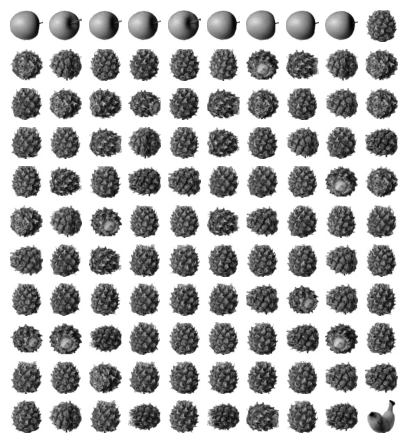

In [ ]:
draw_fruits(fruits[km.labels_ == 0], 0.5)  # 🍍

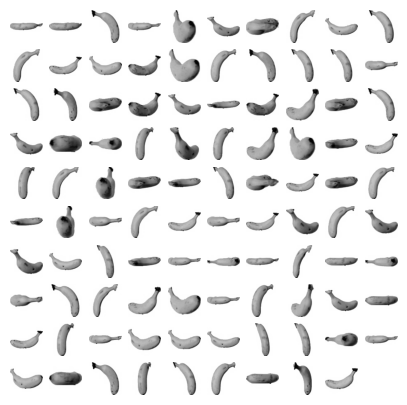

In [ ]:
draw_fruits(fruits[km.labels_ == 1], 0.5)  # 🍌

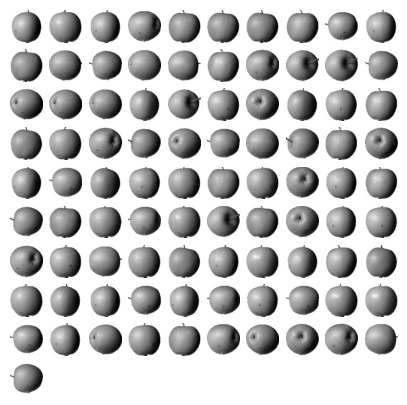

In [ ]:
draw_fruits(fruits[km.labels_ == 2], 0.5)  # 🍎

In [83]:
draw_fruits(fruits[km.labels_ == 3], 0.5)

Error: 이미지 샘플이 없습니다.


In [ ]:
fruits_pca[:5]  # 2개의 특성 분포

array([[2778.41779459, 1571.87380954],
       [3078.27365136, 2739.27040962],
       [2620.61072939, 1486.87055253],
       [3113.71771062, 2530.02283015],
       [2520.64705144, 2330.64791173]])

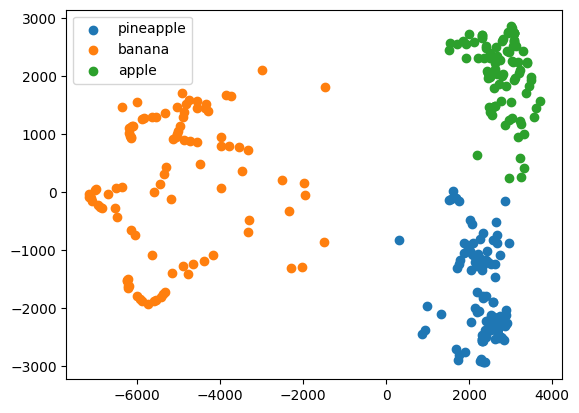

In [86]:
for label in range(0, 3):  # 0(파인애플), 1(바나나), 2(사과)
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])  # 데이터의 분포도 (PCA 2D 분포 시각화)

plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

파인애플과 사과는 약간 중첩된 부분이 있다는 것을 확인할 수 있다.